## Implementing K-Nearest Neighbour Algorithm

* K-Nearest Neighbour algorithm used for classification as well as regression.

### Import required dependecies

In [1]:
import numpy as np
import pandas as pd
import math
from scipy import stats as st
import matplotlib.pyplot as plt

# setting matplotlib plotting parameters
plt.rcdefaults()
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['font.size'] = 12
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10
plt.rc('font', family='serif')

## Classification

### Read csv data using pandas 

In [2]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
x = df[['Glucose', 'Insulin']]
y = df['Outcome']

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [5]:

def get_distance(test_data, training_data, distance_metrics):
    if distance_metrics == 'euclidean':
        return np.sqrt(np.sum((test_data - training_data)**2))
    elif distance_metrics == 'manhatten':
        return np.abs(test_data - training_data)
    
def knn_predict(X_train, y_train, X_test, k =3):
    distance = np.array([get_distance(X_test, X_train, distance_metrics= 'euclidean') for X_train in X_train])
    nearest_neighbors_indices = np.argsort(distance)[:k]
    nearest_labels = y_train[nearest_neighbors_indices]
    predicted_label = np.bincount(nearest_labels).argmax()
    return predicted_label
    
def knn_classify(X_train, y_train, X_test, k = 3):
    predictions = [knn_predict(X_train, y_train, x_test, k) for x_test in X_test]
    return np.array(predictions)

In [6]:
predictions = knn_classify(X_train, y_train, X_test, k = 3)
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0],
      dtype=int64)

In [7]:
from sklearn.metrics import accuracy_score
error = accuracy_score(predictions, y_test)
error

0.7532467532467533

### Comparing output with scikit learn

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [9]:
classifier = KNeighborsClassifier(p=2, n_neighbors=3)

In [10]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7532467532467533

## Regression

### Load sample data

In [26]:
df_regression = pd.read_csv('https://raw.githubusercontent.com/Baakchsu/LinearRegression/master/weight-height.csv') 
df_regression.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


### Plot sample data

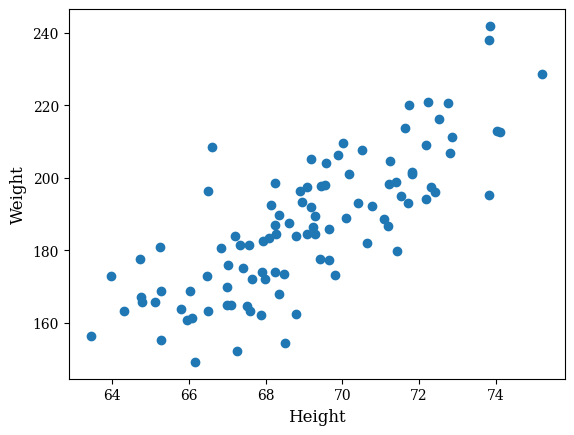

In [27]:
plt.scatter(df_regression['Height'][:100],df_regression['Weight'][:100])  
plt.xlabel('Height')
plt.ylabel('Weight')
plt.show()

In [28]:
x = df_regression['Height']
y = df_regression['Weight']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [33]:

def get_distance(test_data, training_data, distance_metrics):
    if distance_metrics == 'euclidean':
        return np.sqrt(np.sum((test_data - training_data)**2))
    elif distance_metrics == 'manhatten':
        return np.abs(test_data - training_data)
    
def knn_predict(X_train, y_train, X_test, k =3):
    distance = np.array([get_distance(X_test, X_train, distance_metrics= 'euclidean') for X_train in X_train])
    nearest_neighbors_indices = np.argsort(distance)[:k]
    nearest_labels = y_train[nearest_neighbors_indices]
    predicted_label = np.mean(nearest_labels)
    return predicted_label
    
def knn_regressor(X_train, y_train, X_test, k = 3):
    predictions = [knn_predict(X_train, y_train, x_test, k) for x_test in X_test]
    return np.array(predictions)

In [34]:
predictions = knn_regressor(X_train, y_train, X_test, k = 3)
predictions

array([181.42087684, 120.56473264, 207.00212797, ..., 195.39149049,
       167.65748246, 172.34025878])

In [35]:
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(predictions, X_test.reshape(-1,1)))
error

99.93723913056482

### Comparing output with scikit learn

In [36]:
from sklearn.neighbors import KNeighborsRegressor
regressor = KNeighborsRegressor(p = 2, n_neighbors= 3)

In [37]:
X_train = X_train.reshape(-1,1)
X_train.shape

(8000, 1)

In [38]:
y_train = y_train.reshape(-1, 1)
y_train.shape

(8000, 1)

In [39]:
regressor = regressor.fit(X_train, y_train)

In [40]:
y_pred = regressor.predict(X_test.reshape(-1,1))

In [41]:
y_pred

array([[181.42087684],
       [120.56473264],
       [207.00212797],
       ...,
       [195.39149049],
       [167.65748246],
       [172.34025878]])

In [42]:
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(y_pred, X_test))
error

99.93723913056482